In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
np.random.seed(1)

In [5]:
X = np.random.normal(0,10,[40,20])
y = np.random.normal(0,10,[40, 1])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=42)

In [7]:
lr = LinearRegression()

In [8]:
R2 = []
mse_train = []
mse_test = []
for i in range(20):
    lr.fit(X_train[:,:i+1],y_train)
    R_ = lr.score(X_train[:,:i+1],y_train)
    R2.append(R_)
    y_pred = lr.predict(X_train[:,:i+1])
    mse_train.append(mean_squared_error(y_pred, y_train))
    y_pred_t = lr.predict(X_test[:,:i+1])
    mse_test.append(mean_squared_error(y_pred_t, y_test))

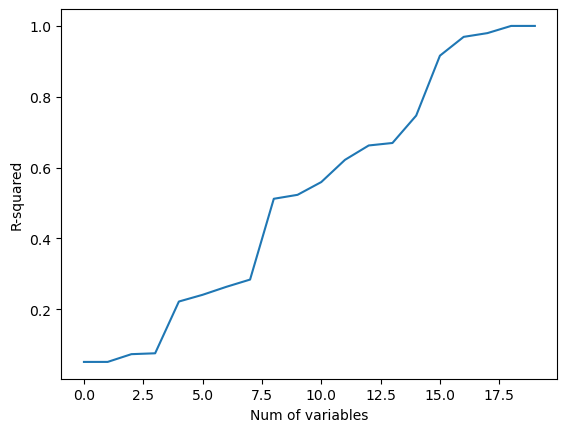

In [9]:
plt.plot(R2)
plt.xlabel('Num of variables')
plt.ylabel('R-squared')
plt.show()

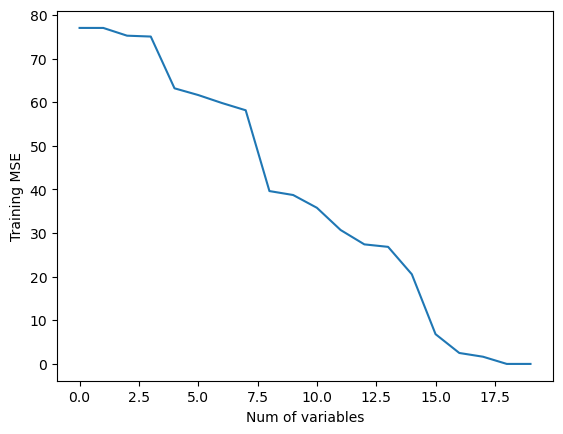

In [10]:
plt.plot(mse_train)
plt.xlabel('Num of variables')
plt.ylabel('Training MSE')
plt.show()

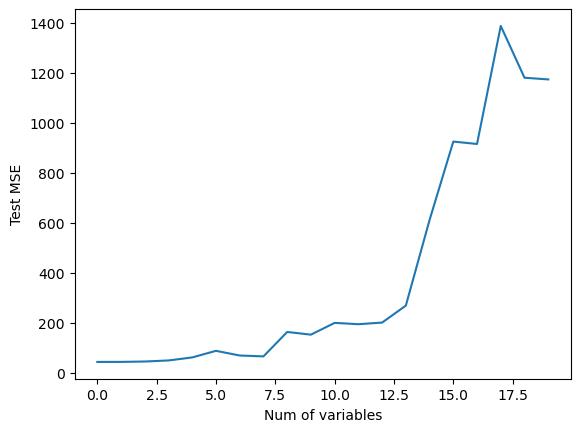

In [11]:
plt.plot(mse_test)
plt.xlabel('Num of variables')
plt.ylabel('Test MSE')
plt.show()

In [59]:
X, y =make_regression(n_samples=2000, n_features=2000, n_informative=20, n_targets=1)

The make_regression() function in sklearn.datasets generates synthetic regression datasets with a specified number of informative features. However, the function does not explicitly indicate which features are informative.

In [61]:
from sklearn.linear_model import Lasso

In [80]:
lasso = Lasso().fit(X, y)
lasso.coef_
np.sum(lasso.coef_ != 0)

20

In [81]:
X_inf = X[:,(lasso.coef_ != 0)]
X_uninf = X[:,(lasso.coef_ == 0)]

In [83]:
X = pd.concat([pd.DataFrame(X_inf),pd.DataFrame(X_uninf)],axis=1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=42)

In [134]:
# p = 20
lasso1 = Lasso(alpha=1).fit(X_train.iloc[:,:20], y_train)
lasso2 = Lasso(alpha=.0001, max_iter=100000).fit(X_train.iloc[:,:20], y_train)

In [135]:
from sklearn.metrics import mean_squared_error

In [137]:
y_pred1 = lasso1.predict(X_test.iloc[:,:20])
round(mean_squared_error(y_pred1,y_test),3)

21.384

In [139]:
y_pred2 = lasso2.predict(X_test.iloc[:,:20])
round(mean_squared_error(y_pred2,y_test),3)

0.0

In [140]:
# p = 2000
lasso1 = Lasso(alpha=1, max_iter=100000).fit(X_train, y_train)
lasso2 = Lasso(alpha=.0001, max_iter=100000).fit(X_train, y_train)

In [142]:
y_pred1 = lasso1.predict(X_test)
round(mean_squared_error(y_pred1,y_test),3)

21.384

In [143]:
y_pred2 = lasso2.predict(X_test)
round(mean_squared_error(y_pred2,y_test),3)

465.416